In [1]:
#1. Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
#2. Dataset
MSFT_Dataset = pd.read_csv(r'C:\\Users\\Stephani G\\Documents\\hani\\college hani\\stupen\\tasks\\Final Project\\MSFT.csv')

In [3]:
MSFT_Dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-04,247.759995,251.649994,247.509995,250.789993,244.464844,25281100
1,2021-06-07,249.979996,254.089996,249.809998,253.809998,247.408676,23079200
2,2021-06-08,255.160004,256.010010,252.509995,252.570007,246.199951,22455000
3,2021-06-09,253.809998,255.529999,253.210007,253.589996,247.194229,17937600
4,2021-06-10,254.289993,257.459991,253.669998,257.239990,250.752167,24563600
...,...,...,...,...,...,...,...
749,2024-05-28,429.630005,430.820007,426.600006,430.320007,430.320007,15718000
750,2024-05-29,425.690002,430.940002,425.690002,429.170013,429.170013,15517100
751,2024-05-30,424.299988,424.299988,414.239990,414.670013,414.670013,28424800
752,2024-05-31,416.750000,416.750000,404.510010,415.130005,415.130005,47995300


In [4]:
#Membagi Dataset
x = MSFT_Dataset[['Open','High','Low','Volume']].values
y = MSFT_Dataset['Close'].values

In [5]:
print(x)
print(y)

[[2.47759995e+02 2.51649994e+02 2.47509995e+02 2.52811000e+07]
 [2.49979996e+02 2.54089996e+02 2.49809998e+02 2.30792000e+07]
 [2.55160004e+02 2.56010010e+02 2.52509995e+02 2.24550000e+07]
 ...
 [4.24299988e+02 4.24299988e+02 4.14239990e+02 2.84248000e+07]
 [4.16750000e+02 4.16750000e+02 4.04510010e+02 4.79953000e+07]
 [4.15529999e+02 4.16429993e+02 4.08920013e+02 1.74847000e+07]]
[250.789993 253.809998 252.570007 253.589996 257.23999  257.890015
 259.890015 258.359985 257.380005 260.899994 259.429993 262.630005
 265.51001  265.269989 266.690002 265.019989 268.720001 271.399994
 270.899994 271.600006 277.649994 277.660004 279.929993 277.420013
 277.940002 277.320007 280.980011 282.51001  281.029999 280.75
 277.01001  279.320007 281.399994 286.140015 289.670013 289.049988
 286.540009 286.220001 286.5      284.910004 284.820007 287.119995
 286.51001  289.519989 289.459991 288.329987 286.440002 286.950012
 289.809998 292.850006 294.600006 293.079987 290.730011 296.769989
 304.359985 304.6

In [6]:
#3. Membagi Data Train dan Data Test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('Train:', x_train.shape)
print('Test:',x_test.shape)

Train: (603, 4)
Test: (151, 4)


In [7]:
#4. Standardisasi Data
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)
print(x_test_scaled)

[[0.31735202 0.33179969 0.33252236 0.40054242]
 [0.04088643 0.07119822 0.0590465  0.38714312]
 [0.24823561 0.24599191 0.25724048 0.2321635 ]
 ...
 [0.71304229 0.70168858 0.69934026 0.28146048]
 [0.54248615 0.52836548 0.49843257 0.17334642]
 [0.93215403 0.92149692 0.91489261 0.08734785]]
[[ 0.73543797  0.73195139  0.71744719  0.19768775]
 [ 0.9512563   0.95659808  0.96224205  0.08988884]
 [ 0.06464661  0.06811498  0.08272122  0.23967691]
 [ 0.36976576  0.35518453  0.37201144  0.1769203 ]
 [ 0.20222075  0.22379277  0.218266    0.51263787]
 [ 0.32375075  0.30917366  0.32896642  0.08699699]
 [ 0.19963305  0.21293053  0.21419546  0.45338005]
 [ 0.30488381  0.29442181  0.31404104  0.17128186]
 [ 0.9491861   0.95346742  0.93276567  0.44133742]
 [ 0.38891498  0.41367038  0.4049034   0.31880224]
 [ 0.08464285  0.07423398  0.06976092  0.25850414]
 [ 0.39032657  0.38724984  0.3943761   0.20331142]
 [ 0.91610997  0.90816803  0.90310209  0.29887194]
 [ 0.2287099   0.21942894  0.2434848   0.15076187

In [8]:
#5. Membuat Data Latih Menggunakan Regresi Linear
regressor = LinearRegression()
model = regressor.fit(x_train_scaled,y_train)
predicted = regressor.predict(x_test_scaled)

In [9]:
#6. Evaluasi model dengan Cross Validation
def evaluate_model(model, x, y):
    scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    return np.mean(rmse_scores)

In [10]:
rmse = evaluate_model(model, x_train_scaled, y_train)
print(f"Cross-validated RMSE: {rmse}")

Cross-validated RMSE: 1.8340402454928282


In [11]:
with open('stock_model.pkl','wb') as file:
    pickle.dump(model,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [12]:
#Actual price vs Predicted price
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

     Actual_Price  Predicted_Price
0      370.869995       369.882114
1      420.450012       422.506085
2      235.770004       235.236810
3      294.170013       293.983126
4      267.559998       267.500473
..            ...              ...
146    214.250000       215.454826
147    310.200012       309.742989
148    343.109985       344.662081
149    338.700012       338.681701
150    311.739990       313.399346

[151 rows x 2 columns]


In [13]:
dfr.describe()

,Actual_Price,Predicted_Price
count,151.000000,151.000000
mean,305.563576,305.850030
std,53.974756,53.825420
min,214.250000,215.454826
25%,263.434998,263.848991
50%,295.369995,296.886267
75%,332.240005,331.798509
max,429.040009,430.651846


In [14]:
# Uji Akurasi
x2 = abs(predicted - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy:',round(accuracy,2),'%.')

Accuracy: 99.57 %.


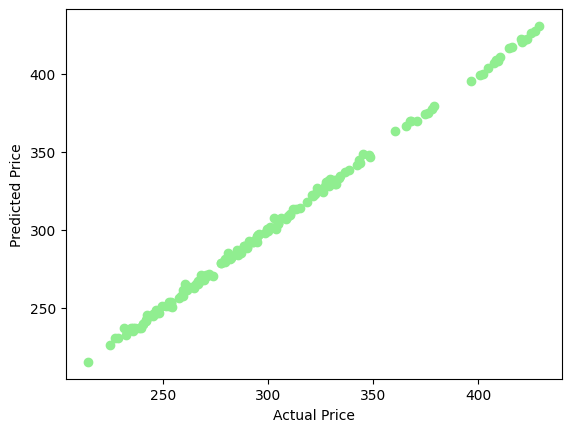

In [15]:
#Visualisasi dalam Grafik
plt.scatter(dfr.Actual_Price,dfr.Predicted_Price,color='lightgreen')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

[]

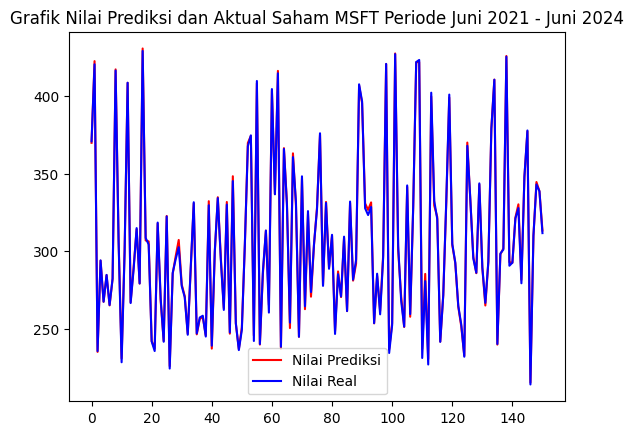

In [16]:
plt.plot(dfr.Predicted_Price,"r",label="Nilai Prediksi")
plt.plot(dfr.Actual_Price,"b",label="Nilai Real")
plt.legend()
plt.title("Grafik Nilai Prediksi dan Aktual Saham MSFT Periode Juni 2021 - Juni 2024")
plt.plot()

<Axes: >

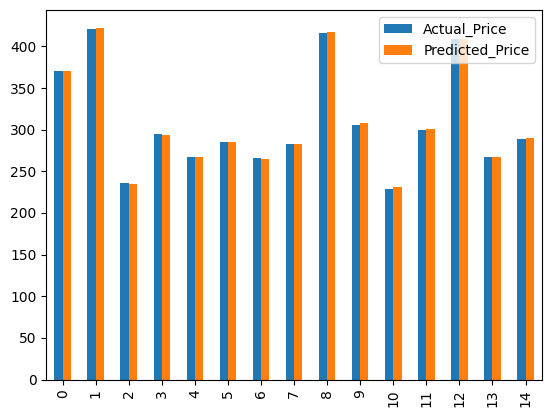

In [17]:
graph = dfr.head(15)
graph.plot(kind='bar')

In [18]:
#Simpan Model
filename = 'Final_Project.sav'
pickle.dump(regressor,open(filename,'wb'))